In [34]:
#import required libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

#imports dataset using pandas
dataset = pd.read_csv('oxford_cgrt.csv')

#rows, columns
dataset.shape

(10561, 35)

In [35]:
#manipulate dataset

#dates did not convert correctly, however they are still organized correctly 
dataset["Date"]=pd.to_datetime(dataset["Date"]) #data in column converts to datetime

dataset = dataset.sort_values(by=['CountryName', 'Date']) #sorts the countries together and also by date 

#Last observation carried forward (LOCF) applied to each country so values are not carried to another country.
dataset = dataset.groupby(['CountryCode']).fillna(method='ffill') 

#average confirmed cases as our y 
dataset['ConfirmedCases'] = dataset['ConfirmedCases'].fillna(1) 
y = dataset.groupby('CountryName')['ConfirmedCases'].mean()

#gets last row for each country 
dataset = dataset.groupby('CountryName').tail(1) 


In [36]:
dataset = dataset.sort_values(by='ConfirmedCases', ascending=True) #sorts the confirmedcases in ascending order 


In [37]:
dataset.shape #to determine number of values for confirmedcases

(190, 34)

In [38]:
dataset.insert(2, "Numbers", range(1,191), True) 

In [39]:
dataset

,CountryName,Date,Numbers,S1_School closing,S1_IsGeneral,S1_Notes,S2_Workplace closing,S2_IsGeneral,S2_Notes,S3_Cancel public events,...,S9_Monetary measures,S9_Notes,S10_Emergency investment in health care,S10_Notes,S11_Investment in Vaccines,S11_Notes,ConfirmedCases,ConfirmedDeaths,StringencyIndex,AverageCases
10483,Papua New Guinea,1970-01-01 00:00:00.020200330,1,2.0,1.0,Facebook post from @govpng date stamped 25/3/2...,1.0,1.0,Facebook post from @govpng: 'All heads of depa...,2.0,...,3.00,The Central Bank has announced an easing of mo...,0.000000e+00,NaN,0.0,NaN,1.0,0.0,95.0,1.000000
9795,Burundi,1970-01-01 00:00:00.020200327,2,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
10523,Saint Vincent and the Grenadines,1970-01-01 00:00:00.020200330,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,1.000000
10047,Hong Kong,1970-01-01 00:00:00.020200328,4,2.0,1.0,There is now little to no possibility that Hon...,2.0,1.0,"In view of the latest situation, the Governmen...",2.0,...,0.86,https://www.hkma.gov.hk/eng/news-and-media/pre...,0.000000e+00,HK$10.19 billion - https://www.legco.gov.hk/yr...,0.0,NaN,1.0,NaN,81.0,NaN
10187,Botswana,1970-01-01 00:00:00.020200329,5,2.0,1.0,President Masisi announced school closures on ...,2.0,1.0,"Restaurant hours limited to 10am to 8pm, bars,...",2.0,...,4.75,https://tradingeconomics.com/botswana/interest...,0.000000e+00,NaN,0.0,NaN,1.0,NaN,29.0,NaN
10513,Timor,1970-01-01 00:00:00.020200330,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,1.000000
9340,Macao,1970-01-01 00:00:00.020200324,7,2.0,1.0,Class resumption for non-tertiary education sc...,0.0,0.0,public services resume normal https://news.gov...,2.0,...,NaN,NaN,NaN,https://news.gov.mo/detail/en/N20BMQ4RQa?8,NaN,NaN,1.0,NaN,67.0,NaN
10525,British Virgin Islands,1970-01-01 00:00:00.020200330,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,2.000000
10413,Guinea-Bissau,1970-01-01 00:00:00.020200330,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,2.000000
10367,Belize,1970-01-01 00:00:00.020200330,10,2.0,1.0,"'Effective Friday, March 20th, all schools wil...",1.0,1.0,'places of employment that should have busines...,2.0,...,2.30,'The benchmark interest rate in Belize was las...,0.000000e+00,NaN,0.0,NaN,2.0,0.0,67.0,1.714286


Text(0, 0.5, 'Average number of cases')

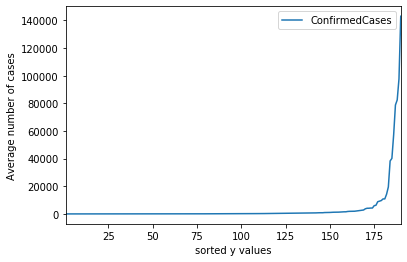

In [41]:
dataset.plot(x = 'Numbers', y='ConfirmedCases', kind='line')
plt.xlabel('sorted y values')
plt.ylabel('Average number of cases')